# Klasse D resonante Versterkers

In [1]:
# %config InlineBackend.figure_format = 'svg'
%run cursusdef.py

######  Overzicht
 


In dit hoofdstuk bespreken we de klasse D resonante hoogfrequent versterkers. Hierbij gebruiken we 2 vermogentransistors die een resonante kring aan hoge frequentie aanstuurt. Het ontwerp van de kring is dusdanig dat enkel maar de component op resonantie door de resonante kring doorgelaten wordt naar de belasting. In die optiek kunnen we ook de resonante kring beschouwen als een banddoorlaatfilter.

Het is belangrijk hierin een verschil te maken met de klasse D audio versterkers. Hierin worden beide vermogentransistors ook aan hoge frequenties geschakeld maar dient het LRC filtercircuit dat erachter hangt als een laagdoorlaatfilter, zodat de belasting enkel maar de laagfrequente component van het stuursignaal ziet. 

In {numref}`vermogenversterkersD` situeren we de klasse D versterkers tussen de andere vermogenversterkers.

:::{list-table} Indeling van de vermogenversterkers
:header-rows: 1
:name: vermogenversterkersD

* - 
  - laagfrequent of breedband
  - hoogfrequent of resonant
* - 1 transistor in de vermogentrap
  - Klasse A
  - Klasse C <BR> Klasse F <BR>Klasse E
* - 2 of meer  transistors in de vermogentrap
  - Klasse B  <BR> Klasse G
  - **Klasse D**
:::

## Basisschema met spanningssturing

{numref}`dfig1` toont het basisschema van de klasse D versterker met spanningssturing. Hiervoor gebruiken we een serie-resonante kring. Deze serie-resonante kring zal de opgelegde spanningspulsen (wat ook de vorm van deze pulsen is) omzetten in een sinusoidale stroom doorheen de kring. Aangezien deze sinusoidale stroom ook door de belasting $R_L$ loopt, zullen we over de belasting $R_L$ ook een sinusoidale spanning krijgen. Op deze mannier hebben we zowel een sinusoidale spanning over als een sinusoidale stroom door de belasting $R_L$.

De aansturing gebeurt aan de hand van een blokgolf en bij de klasse D versterker gebruiken we hiervoor 2 vermogentransistors, een pull-up transistor en een pull down transistor. In {numref}`dfig1` is het de bedoeling dat deze transistors gewoon de blokgolf aan de ingang volgen maar wel meer stroom kunnen leveren dan de ingang normaal levert. Daarom worden de transistors hier in [gemeenschappelijke collector schakeling](https://en.wikipedia.org/wiki/Common_collector) (in het geval van bipolaire transistors) of [gemeenschappelijke drain schakeling](https://en.wikipedia.org/wiki/Common_drain) (in het geval van MOS transistors) gebruikt. Hierdoor volgt de uitgang de ingang op een vaste offset na.

In {numref}`dfig1` is er gekozen voor een implementatie met bipolaire transistors. Het gebruik van de gemeenschappelijke collector schakeling wil zeggen dat we voor de pull-up transistor hier steeds een npn transistor gaan gebruiken en voor de pull-down transistor een pnp-transistor. De stroom aan de ingang zal een factor $\beta_{F}$ lager liggen dan de stroom die naar de trilkring loopt.

###### Basisschema van de klasse D versterker

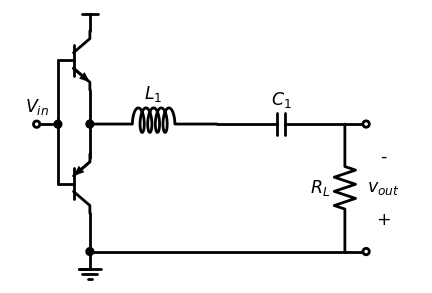

In [6]:
d = schem.Drawing()
T1 = d.add(e.BJT_NPN)
d.add(e.LINE, xy=T1.base, d='down', l=1.5)
indot=d.add(e.DOT)
d.add(e.LINE, d='down', l=1.4)
T2 = d.add(e.BJT_PNP, d='right')
d.add(e.VDD, xy=T1.collector,  l=0.75)
d.add(e.LINE, xy=indot.start, d='left', l=0.5)
d.add(e.DOT_OPEN, label='$V_{in}$')
d.add(e.LINE, d='down',xy=T1.emitter, l=0.8)
d.add(e.DOT)
L1 = d.add(e.INDUCTOR2, d='right', label='$L_1$')
d.add(e.LINE, d='down',xy=L1.start, l=0.8)
C1 = d.add(e.CAP, d='right',xy=L1.end, label='$C_1$')
R = d.add(e.RES, d='down', label='$R_L$')
d.add(e.LINE, xy=R.start, d='right', l=0.5)
dot=d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='right',l=0.5)
d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='left', tox=L1.start)
d.add(e.DOT)
d.add(e.GND)
d.add(e.LINE,d='up',toy=T2.collector)
d.add(e.GAP_LABEL, d='down', xy= dot.start, toy= R.end, label=['-','$v_{out}$','$+$'],lblofst=0.4)
d.draw()

In de literatuur vinden we ook de Klasse D versterker vaak terug met MOS transistors in de gemeenschappelijke source schakeling (GSS). Een voorbeeld hiervan zien we in {numref}`dfig1MOS`. In dit geval werken de 2 vermogentransistors als een inverter.

###### Klasse D versterker met MOS transistors in GSS

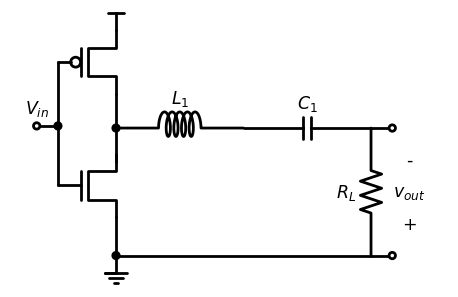

In [7]:
d = schem.Drawing()
T1 = d.add(e.PFET, d='left')
d.add(e.LINE, xy=T1.gate, d='down', l=1.5)
indot=d.add(e.DOT)
d.add(e.LINE, d='down', l=1.4)
T2 = d.add(e.NFET, d='left',anchor='gate')
d.add(e.VDD, xy=T1.drain,  l=0.75)
d.add(e.LINE, xy=indot.start, d='left', l=0.5)
d.add(e.DOT_OPEN, label='$V_{in}$')
d.add(e.LINE, d='down',xy=T1.source, l=0.8)
d.add(e.DOT)
L1 = d.add(e.INDUCTOR2, d='right', label='$L_1$')
d.add(e.LINE, d='down',xy=L1.start, l=0.8)
C1 = d.add(e.CAP, d='right',xy=L1.end, label='$C_1$')
R = d.add(e.RES, d='down', label='$R_L$')
d.add(e.LINE, xy=R.start, d='right', l=0.5)
dot=d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='right',l=0.5)
d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='left', tox=L1.start)
d.add(e.DOT)
d.add(e.GND)
d.add(e.LINE,d='up',toy=T2.drain)
d.add(e.GAP_LABEL, d='down', xy= dot.start, toy= R.end, label=['-','$v_{out}$','$+$'],lblofst=0.4)
d.draw()

In {numref}`dfig2` hebben we de verschillende knopen van {numref}`dfig1` een nummer gegeven om tot een spice-simulatie te kunnen komen.

###### Basisschema van de klasse D versterker met nummering van de knopen

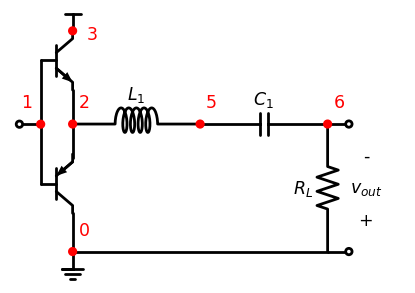

In [8]:
d = schem.Drawing()
T1 = d.add(e.BJT_NPN)
d.add(e.LINE, xy=T1.base, d='down', l=1.5)
indot=d.add(e.DOT,color='red')
indot.add_label('1',  loc='center', ofst=[-0.2,.3], align=('right','bottom'))
d.add(e.LINE, d='down', l=1.4)
T2 = d.add(e.BJT_PNP, d='right')
d.add(e.VDD, xy=T1.collector,  l=0.75)
vdd=d.add(e.DOT,color='red')
vdd.add_label('3',  loc='center', ofst=[0.6,-0.3], align=('right','bottom'))
d.add(e.LINE, xy=indot.start, d='left', l=0.5)
d.add(e.DOT_OPEN)
d.add(e.LINE, d='down',xy=T1.emitter, l=0.8)
pwm=d.add(e.DOT,color='red')
pwm.add_label('2',  loc='center', ofst=[0.4,.3], align=('right','bottom'))
L1 = d.add(e.INDUCTOR2, d='right', label='$L_1$')
mid=d.add(e.DOT,color='red')
mid.add_label('5',  loc='center', ofst=[0.4,.3], align=('right','bottom'))
d.add(e.LINE, d='down',xy=L1.start, l=0.8)
C1 = d.add(e.CAP, d='right',xy=L1.end, label='$C_1$')
out=d.add(e.DOT,color='red')
out.add_label('6',  loc='center', ofst=[0.4,.3], align=('right','bottom'))
R = d.add(e.RES, d='down', label='$R_L$')
d.add(e.LINE, xy=R.start, d='right', l=0.5)
dot=d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='right',l=0.5)
d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='left', tox=L1.start)
gg=d.add(e.DOT,color='red')
gg.add_label('0',  loc='center', ofst=[0.4,.3], align=('right','bottom'))
d.add(e.GND)
d.add(e.LINE,d='up',toy=T2.collector)
d.add(e.GAP_LABEL, d='down', xy= dot.start, toy= R.end, label=['-','$v_{out}$','$+$'],lblofst=0.4)
d.draw()

De overeenkomende SPICE code voor dit circuit is kan je zien in {numref}`listingD1`. We werken hier met een voedingsspanning $V_{dd}$ van 20V en we leggen ook pulsen aan van 20V aan de ingangsknoop 1. De spanning op knoop 2 zal dan typisch 0.6V tot 0.7V verschillen van de ingangsspanning. 

###### SPICE file Klasse D circuit

```{literalinclude} ./simul/classD.sp
:language: spice
:name: listingD1
:caption: Basis Klasse D circuit
```

In [2]:
spicelisting('simul/classD.sp')

* Class D amp 1
Q_Q1         3 1 2 Q2
Q_Qp         0 1 2 Qp
L_L1         5 2 1uH
C_C1         5 6 10n
R_RL         6 0 6
V_Vdd        3 0 20V
R_Rin        4 1 1
V_Vin        4 0 PULSE(0 20 0 20ns 20ns 294ns 628ns) DC=0
.model Q2  NPN(Is=14.34f BF=200)
.model Qp  PNP(Is=5.34f BF=100)

In {numref}`dfig5` tonen we de spanningen die we bekomen uit de SPICE simulatie. 

###### Bekomen spanningen op de verschillende knopen

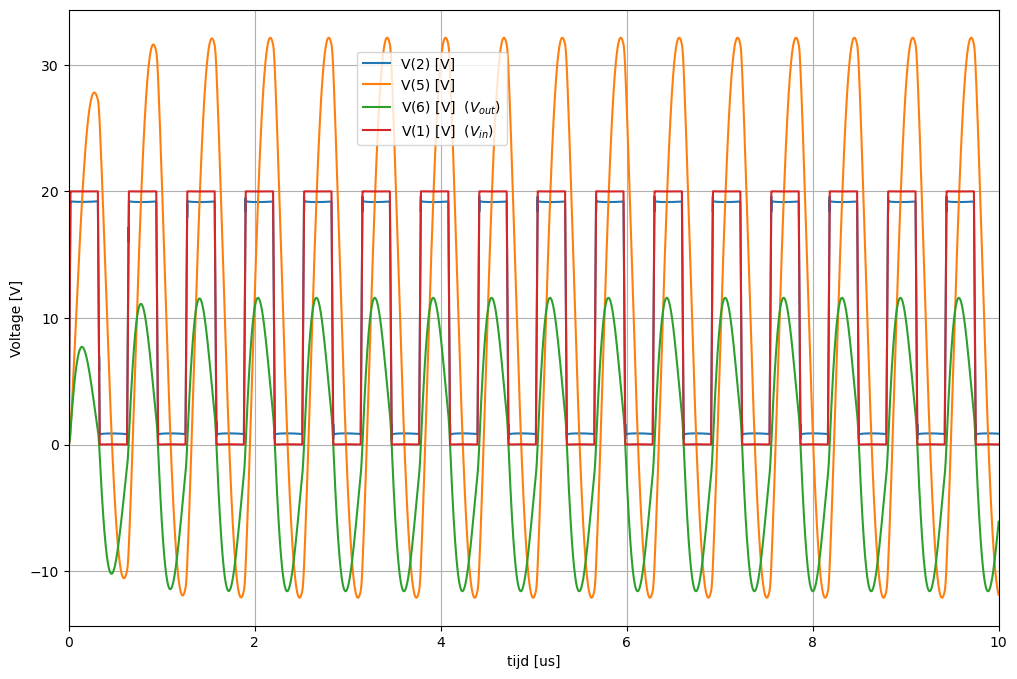

In [6]:
# .print TRAN IC(Q_Q1) IC(Q_Qp) I(R_RL)

circuit=SpiceParser(path='simul/classD.sp').build_circuit()  
end_time=1e-5
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
#simulator.save('2 1 5 6')  # dit mag niet langer zijn dan 15 tekens "v(1) v(2) v(5) v(6)" kan niet maar wel de 3 eerste
analysis = simulator.transient(step_time=2e-10, end_time=end_time)
figure, ax = plt.subplots(figsize=(12, 8))
ax.plot(analysis.time*1e6,analysis.nodes['2'],label='V(2) [V]')
ax.plot(analysis.time*1e6,analysis.nodes['5'],label='V(5) [V]' )
ax.plot(analysis.time*1e6,analysis.nodes['6'],label='V(6) [V]  ($V_{out}$)' )
ax.plot(analysis.time*1e6,analysis.nodes['1'],label='V(1) [V]  ($V_{in}$)')
ax.grid()
ax.legend( loc=(0.31,.78))
ax.set_xlabel('tijd [us]')
ax.set_xlim(0,end_time*1e6)
ax.set_ylabel('Voltage [V]')
plt.show()

We merken op dat de spanning aan knoop 5 een veel grotere swing heeft dan de uitgangspanning over $R_L$ (i.e. knoop 6). De spanning op knoop 2 is typisch de verzadigingsspanning van Q1 lager dan de voedingsspanning (hier 20V) of de verzadigingsspanning van Qp hoger dan de grond. 

In {numref}`dfig6` tonen we de stromen die we bekomen uit de SPICE simulatie. De pull-up transistor levert alle positieve stromen en de pulldown transistor levert alle negatieve stromen. Dit is hier enkel maar zo omdat de aansturing perfect op de resonantiefrequentie gedaan wordt.

###### Collector stroom in de NPN en de PNP transistor

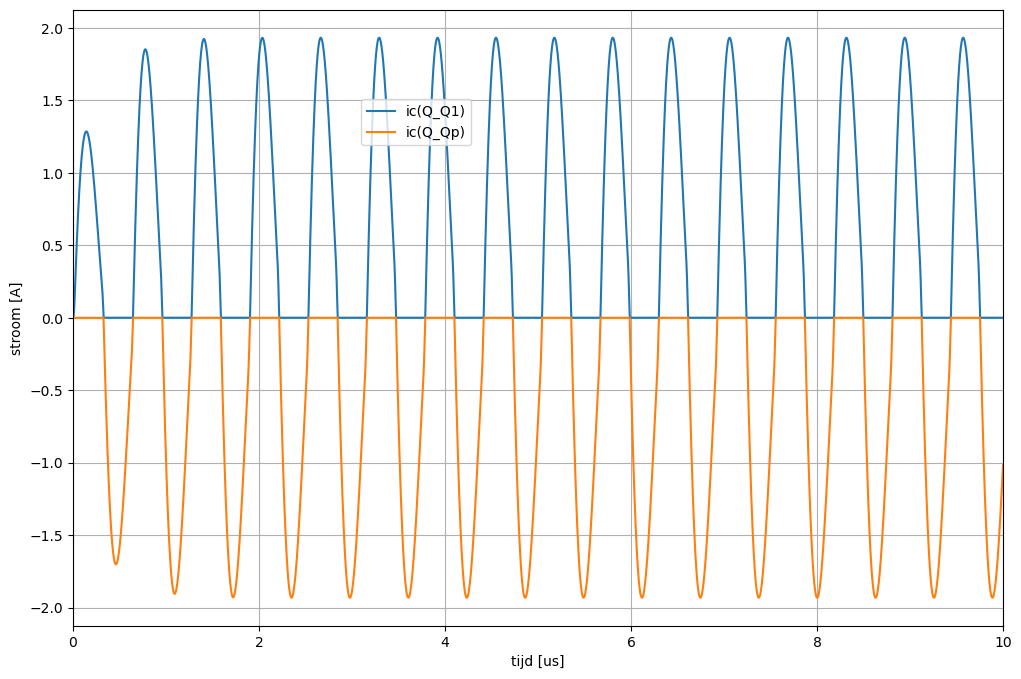

In [5]:
circuit=SpiceParser(path='simul/classD.sp').build_circuit()  
end_time=1e-5
simulator = circuit.simulator(temperature=25, nominal_temperature=25)

#simulator.save("@Q_Q1[ie]")

analysis = simulator.transient(step_time=2e-10, end_time=end_time)
figure, ax = plt.subplots(figsize=(12, 8))
#ax.plot(analysis.time*1e6,-analysis.branches['Q_Q1[ie]']*201/200,label='ic(Q_Q1)' )
ax.plot(analysis.time*1e6,-analysis.branches['v_vdd']*201/200,label= 'ic(Q_Q1)')
ax.plot(analysis.time*1e6,analysis.branches['v_vdd']*201/200-analysis.branches['l_l1'],label= 'ic(Q_Qp)')
ax.grid()
ax.legend( loc=(0.31,.78))
ax.set_xlabel('tijd [us]')
ax.set_xlim(0,end_time*1e6)
ax.set_ylabel('stroom [A]')
plt.show()

### Harmonische componenten

De spanning aan knoop 2 is de uitgang van de vermogentransistors. Deze spanning kunnen we, na een overgangsverschijnsel (in {numref}`dfig5` is dit ongeveer $2\mu s$), benaderen als een blokgolf. De Fourrier reeks van deze blokgolf is:

###### Fourrier reeks van de spanning op knoop 2

$$ V[2] = \frac{V_{dd}}{2} +\frac{2 V_{dd}}{\pi}\left(\sin(\omega t) +\frac{\sin(3\omega t)}{3} +\frac{\sin(5\omega t)}{5} + ... \right)$$

In {numref}`dFFT1` tonen we de verschillende componenten van de spanning op knoop 2. 

In praktijk zal de amplitude van de eerste harmonische op knoop 2 (iets) lager zijn dan $\frac{2 V_{dd}}{\pi}$ omdat we over de vermogentransistors een spanning verliezen. In het geval van het gebruik van de vermogentransistors in de gemeenschappelijke collector schakeling (zoals boven) verliezen we typisch de diode spanning tussen basis en emitter (hier ongeveer 0.7 V). In andere gevallen is het vaak de saturatiespanning van de bipolaire transistor of de spanning over de aan weerstand in het geval van een MOS transistor. We zien in {numref}`dFFT1` dat deze overeenkomt met $\frac{2 (V_{dd}-1.4V)}{\pi}$ = 11.84V. Dit is ook de spanningpiek die we zien op knoop 6 ($V_{out}$) in {numref}`dfig5` wanneer de steady-state oscillatie bekomen wordt.

In [7]:
circuit=SpiceParser(path='simul/classD.sp').build_circuit()  
end_time=1e-5
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=2e-10, end_time=end_time)
analysis.time[2000],analysis.time[10000],analysis.nodes['2'][2000],analysis.nodes['2'][10000],analysis.nodes['2'][10000]-analysis.nodes['2'][2000]

(PeriodValue(3.9650000000000475e-07 s),
 PeriodValue(1.9905000000000066e-06 s),
 UnitValue(0.8640144704168158 V),
 UnitValue(19.158670636509783 V),
 UnitValue(18.294656166092967 V))

In [ ]:
Vact=2*(20-1.4)/np.pi  #theoretisch
Vacm=2*18.294656166092967/np.pi #simulatie
Vact,Vact**2/2/6,Vacm,Vacm**2/2/6

###### Harmonische componenten in de spanning

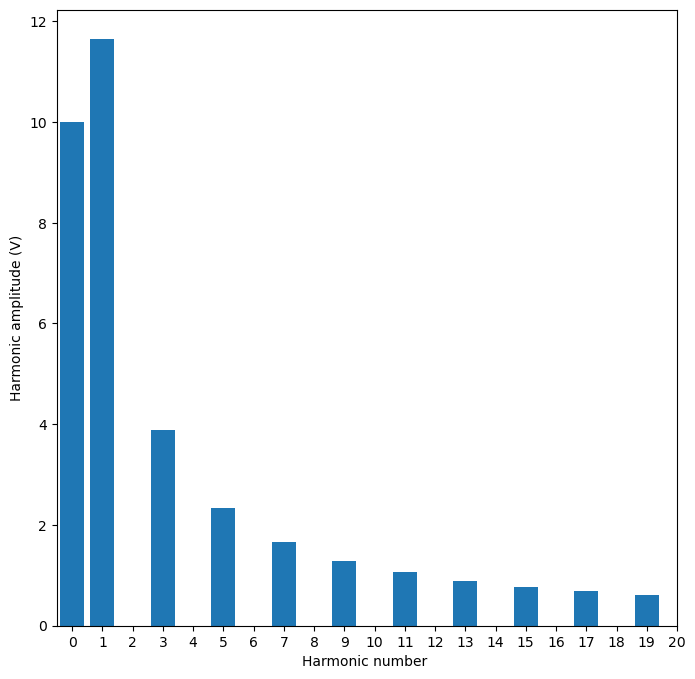

In [8]:
nn=[i for i in range(21)]
ii=[10]+[2/(i*np.pi)*18.294656166092967 if i%2==1 else 0 for i in range(1,21)]

figure, ax = plt.subplots(figsize=(8, 8))
ax.bar(nn,ii)
ax.set_xlim(-0.5,20)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xlabel('Harmonic number ')
ax.set_ylabel('Harmonic amplitude (V)')
plt.show()

### Impedantie van de trilkring

De impedantie van de serie trilkring is:

###### impedantie van de serie trilkring

$$
Z(\omega) = j \omega L_1 +\frac{1}{j \omega C_1} + R_L
$$

Elk van de harmonische componenten $V(\omega)$ uit {numref}`dFFT1` levert dus een $I(\omega)$ die overeenkomt met

$$
I(\omega) = \frac{V(\omega)}{Z(\omega)}
$$

of meer in detail uitgewerkt:

$$
I(\omega) = \frac{V(\omega)}{j \omega L_1 +\frac{1}{j \omega C_1} + R_L}
$$

Bij de resonantiefrequentie $\omega_c= \sqrt{\frac{1}{L_1 C_1}}$ wordt

$$
j \omega L_1 =-\frac{1}{j \omega C_1}
$$

waardoor $Z(\omega_c) =  R_L $ en we dus een hoge stroom harmonische $I(\omega_c) = \frac{V(\omega_c)}{R_L}$ krijgen. Bij alle andere frequenties wordt de stroom $I(\omega)$ veel kleiner. {numref}`dFFT2` toont de amplitude van de stroom bij de verschillende harmonische frequenties. We herkennen de stroomamplitude van bijna 2A die we ook in de simulatie van {numref}`dfig6` terugvinden.

###### Harmonische componenten van de uitgangsstroom

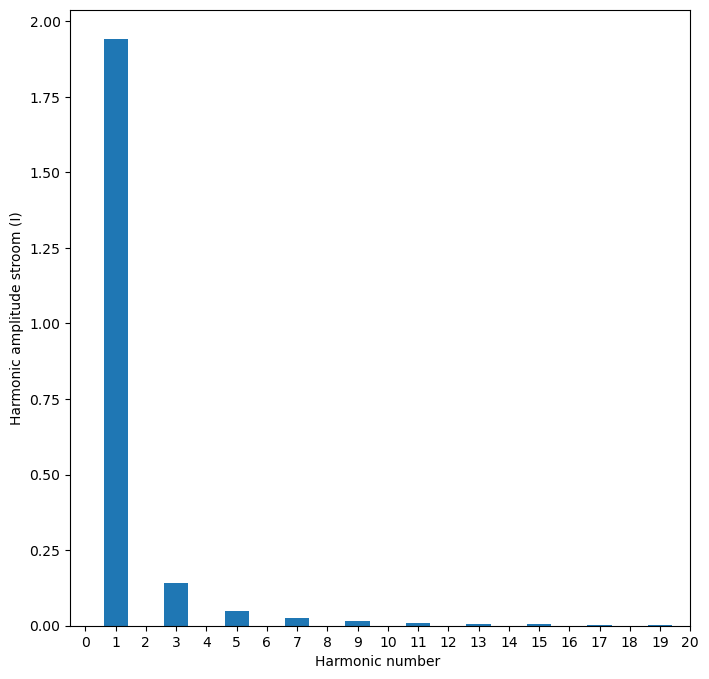

In [9]:
nn=[i for i in range(21)]
wc=np.sqrt(1/1e-6/10e-9)
ii=[0]+[2/(i*np.pi)*18.294656166092967/abs(6+1e-6j*i*wc+1/(10e-9j*i*wc) ) if i%2==1 else 0 for i in range(1,21)]

figure, ax = plt.subplots(figsize=(8, 8))
ax.bar(nn,ii)
ax.set_xlim(-0.5,20)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xlabel('Harmonic number ')
ax.set_ylabel('Harmonic amplitude stroom (I)')
plt.show()

Aangezien de stroomamplitudes in {numref}`dFFT2` stel heel klein worden voor de hogere harmonischen plotten we ditzelfde nogmaals op een log-schaal (zie {numref}`dFFT2log`).

###### Harmonische componenten van de uitgangsstroom (logschaal)

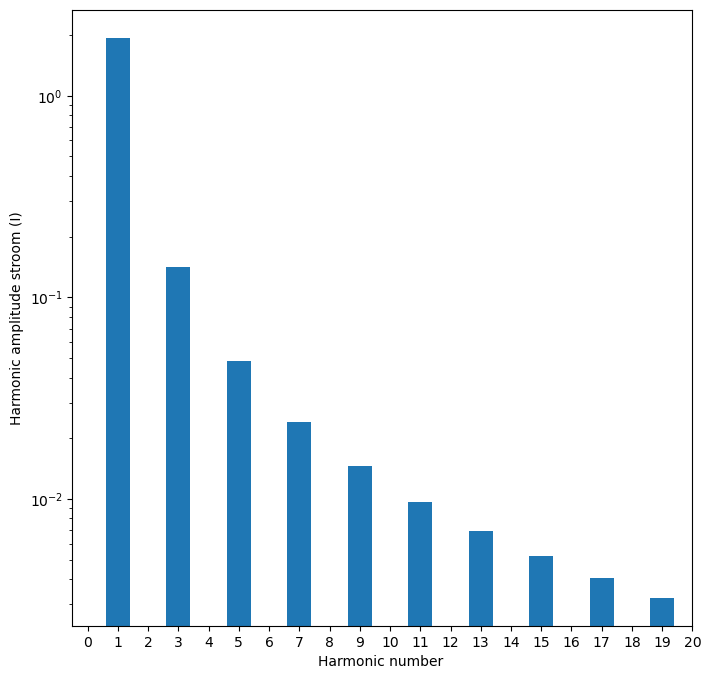

In [10]:
nn=[i for i in range(21)]
wc=np.sqrt(1/1e-6/10e-9)
ii=[0]+[2/(i*np.pi)*18.294656166092967/abs(6+1e-6j*i*wc+1/(10e-9j*i*wc) ) if i%2==1 else 0 for i in range(1,21)]

figure, ax = plt.subplots(figsize=(8, 8))
ax.bar(nn,ii)
ax.set_xlim(-0.5,20)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xlabel('Harmonic number ')
ax.set_ylabel('Harmonic amplitude stroom (I)')
ax.set_yscale('log')

### Simulatie met aansturing off-resonantie

Wanneer het mogelijk is dat de aansturing van de klasse D versterker niet helemaal exact gelijk met de resonantie frequentie gebeurt,moeten we het schema van {numref}`dfig1` uitbreiden met diodes om een omgekeerde stroom door de transistors mogelijk te maken. Het nieuwe schema zien we in {numref}`dfig1diode` .

###### Basisschema van de klasse D versterker met beschermdiodes

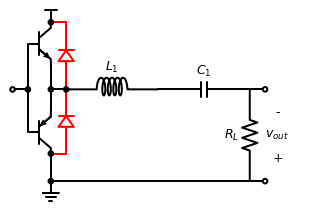

In [14]:
d = schem.Drawing()
T1 = d.add(e.BJT_NPN)
d.add(e.LINE, xy=T1.base, d='down', l=1.5)
indot=d.add(e.DOT)
d.add(e.LINE, d='down', l=1.4)
T2 = d.add(e.BJT_PNP, d='right')
d.add(e.VDD, xy=T1.collector,  l=0.75)
d.add(e.LINE, xy=indot.start, d='left', l=0.5)
d.add(e.DOT_OPEN)
d.add(e.LINE, d='down',xy=T1.emitter, l=0.8)
drive=d.add(e.DOT)
d.add(e.LINE, d='down',xy=drive.start, toy=T2.emitter)
d.add(e.LINE,xy=drive.start, d='right',l=0.5)
drive2=d.add(e.DOT)
L1 = d.add(e.INDUCTOR2, d='right', label='$L_1$')
C1 = d.add(e.CAP, d='right',xy=L1.end, label='$C_1$')
R = d.add(e.RES, d='down', label='$R_L$')
d.add(e.LINE, xy=R.start, d='right', l=0.5)
dot=d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='right',l=0.5)
d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='left', tox=T2.collector)
d.add(e.DOT)
d.add(e.GND)
d.add(e.LINE,d='up',toy=T2.collector)
d.add(e.GAP_LABEL, d='down', xy= dot.start, toy= R.end, label=['-','$v_{out}$','$+$'],lblofst=0.4)
d.add(e.DIODE,d='up',toy=T1.collector,xy=drive2.start,color='red')
d.add(e.LINE, d='left', tox=T1.collector,color='red')
d.add(e.DOT)
d.add(e.DOT,xy=T2.collector)
d.add(e.LINE, d='right', tox=drive2.start,color='red')
d.add(e.DIODE,d='up',toy=drive2.start,color='red')
d.draw()

###### SPICE file Klasse D circuit met diodes

```{literalinclude} ./simul/classD2.sp
:language: spice
:name: listingD1D
:caption: Basis Klasse D circuit met diodes
```

In [45]:
spicelisting('simul/classD2.sp')

* Class D amp 1
Q_Q1         3 1 2 Q2
Q_Qp         0 1 2 Qp
D_D1         2 3 DD
D_D2         0 2 DD
L_L1         5 2 1uH
C_C1         5 6 10n
R_RL         6 0 6
V_Vdd        3 0 20V
R_Rin        4 1 1
V_Vin        4 0 PULSE(0 20 0 20ns 20ns 280ns 600ns) DC=0
.model Q2  NPN(Is=14.34f BF=200)
.model Qp  PNP(Is=5.34f BF=100)
.model DD   D( IS=0.0002 RS=0.05 CJO=5e-10 )

In {numref}`dfig5diode` tonen we de spanningen die we bekomen uit de SPICE simulatie. 

###### Bekomen spanningen in de Klasse D versterker met diodes

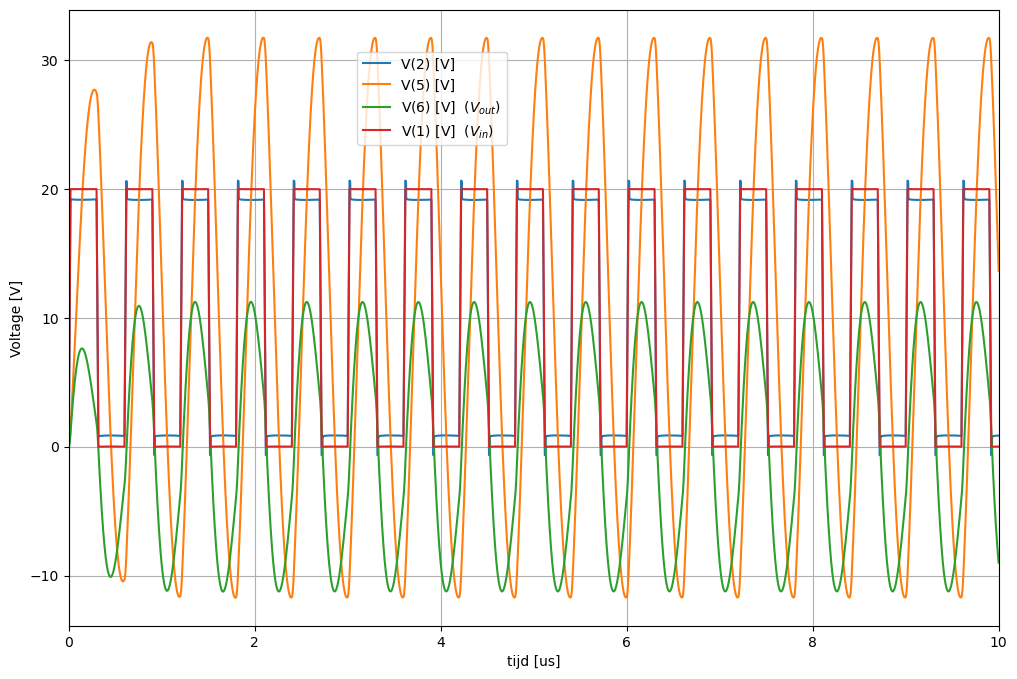

In [2]:
# .print TRAN IC(Q_Q1) IC(Q_Qp) I(R_RL)

circuit=SpiceParser(path='simul/classD2.sp').build_circuit()  
end_time=1e-5
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
#simulator.save('2 1 5 6')  # dit mag niet langer zijn dan 15 tekens "v(1) v(2) v(5) v(6)" kan niet maar wel de 3 eerste
analysis = simulator.transient(step_time=2e-10, end_time=end_time)
figure, ax = plt.subplots(figsize=(12, 8))
ax.plot(analysis.time*1e6,analysis.nodes['2'],label='V(2) [V]')
ax.plot(analysis.time*1e6,analysis.nodes['5'],label='V(5) [V]' )
ax.plot(analysis.time*1e6,analysis.nodes['6'],label='V(6) [V]  ($V_{out}$)' )
ax.plot(analysis.time*1e6,analysis.nodes['1'],label='V(1) [V]  ($V_{in}$)')
ax.grid()
ax.legend( loc=(0.31,.78))
ax.set_xlabel('tijd [us]')
ax.set_xlim(0,end_time*1e6)
ax.set_ylabel('Voltage [V]')
plt.show()

###### Detail van de spanningen

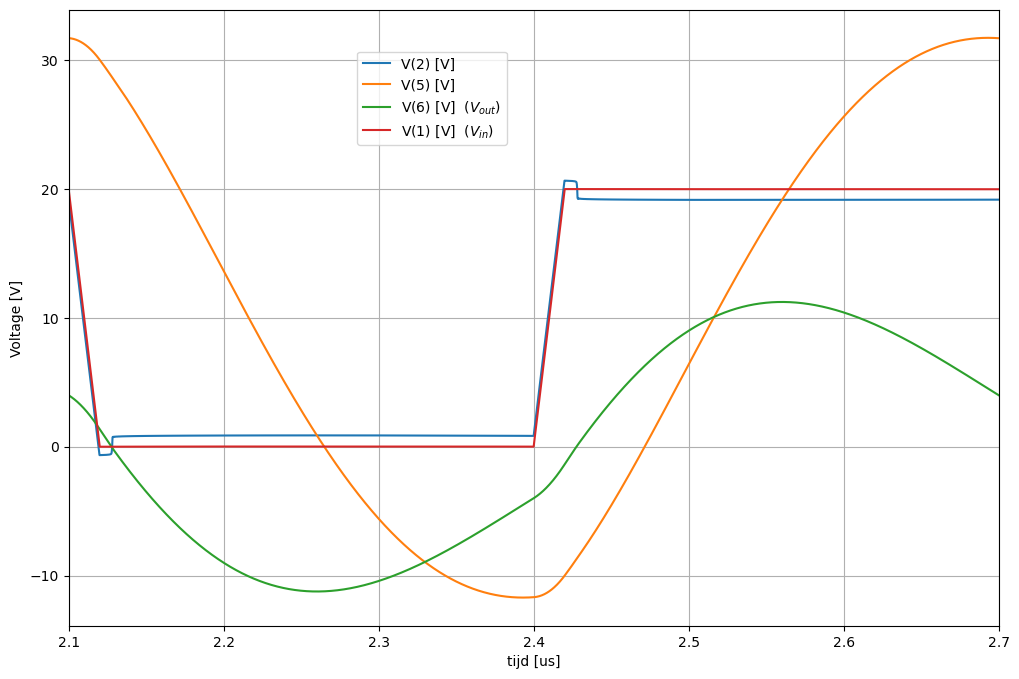

In [3]:
figure, ax = plt.subplots(figsize=(12, 8))
ax.plot(analysis.time*1e6,analysis.nodes['2'],label='V(2) [V]')
ax.plot(analysis.time*1e6,analysis.nodes['5'],label='V(5) [V]' )
ax.plot(analysis.time*1e6,analysis.nodes['6'],label='V(6) [V]  ($V_{out}$)' )
ax.plot(analysis.time*1e6,analysis.nodes['1'],label='V(1) [V]  ($V_{in}$)')
ax.grid()
ax.legend( loc=(0.31,.78))
ax.set_xlabel('tijd [us]')
ax.set_xlim(2.1,2.7)
ax.set_ylabel('Voltage [V]')
plt.show()

We stellen vast in {numref}`dfig5diodedetail` dat de spanning op knoop 2 buiten de voedingsspanning komt te liggen als een van de diodes geleidt en binnen de voedingsspanning ligt als een van de transistors geleidt.

In {numref}`dfig6diode` tonen we de stromen die we bekomen uit de SPICE simulatie. 

###### Stromen in de transistors en diodes

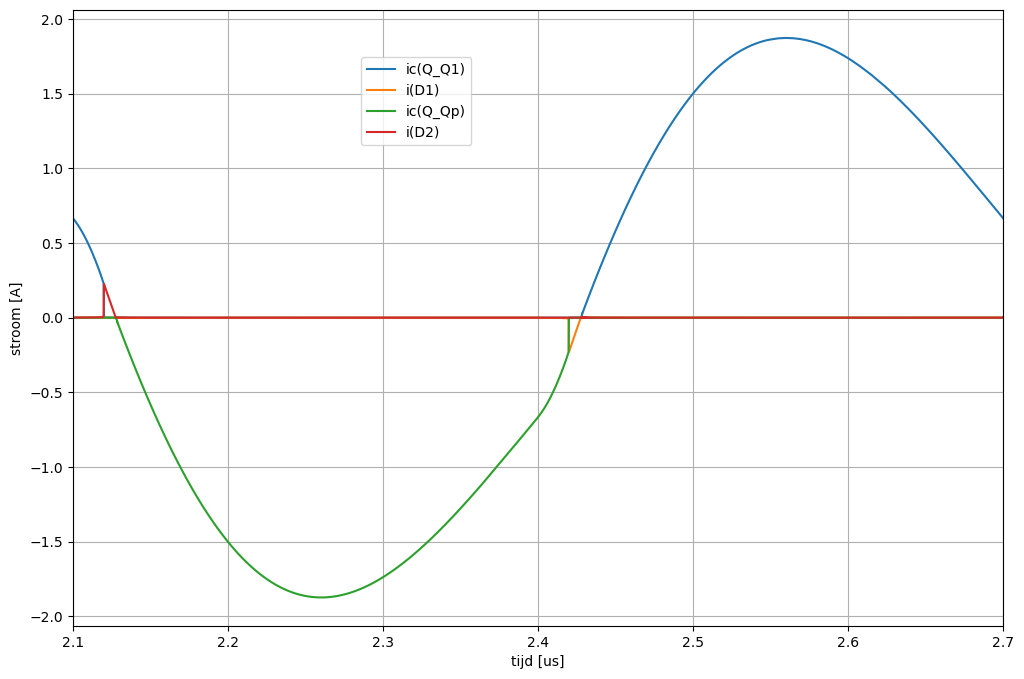

In [4]:
circuit=SpiceParser(path='simul/classD2.sp').build_circuit()  
end_time=1e-5
simulator = circuit.simulator(temperature=25, nominal_temperature=25)

#simulator.save('@Q_Q1[ie]')

analysis = simulator.transient(step_time=2e-10, end_time=end_time)
figure, ax = plt.subplots(figsize=(12, 8))
#ax.plot(analysis.time*1e6,-analysis.branches['Q_Q1[ie]']*201/200,label='ic(Q_Q1)' )
ax.plot(analysis.time*1e6,[-x*201/200 if x.value<0 else 0 for x in analysis.branches['v_vdd'] ],label= 'ic(Q_Q1)')
ax.plot(analysis.time*1e6,[-x*201/200 if x.value>0 else 0 for x in analysis.branches['v_vdd'] ],label= 'i(D1)')
ax.plot(analysis.time*1e6,[x if x.value<0 else 0 for x in analysis.branches['v_vdd']*201/200-analysis.branches['l_l1']],label= 'ic(Q_Qp)')
ax.plot(analysis.time*1e6,[x if x.value>0 else 0 for x in analysis.branches['v_vdd']*201/200-analysis.branches['l_l1']],label= 'i(D2)')
#ax.plot(analysis.time*1e6,analysis.branches['v_vin']*101,label= 'i in')
ax.grid()
ax.legend( loc=(0.31,.78))
ax.set_xlabel('tijd [us]')
ax.set_xlim(2.1,2.7)
ax.set_ylabel('stroom [A]')
plt.show()

## Aansturing van de seriekring aan de hand van 2 NPN transistors

Aangezien de stroomversterking $\beta_F$ van NPN transistors typisch groter is dan deze van PNP transistors, is het vaak interessant om een schema uit te werken waarin er enkel NPN transistors gebruikt worden. {numref}`dfig1NPN` toont hiervan de meest eenvoudige implementatie.


###### klasse D versterker met enkel NPN transistors

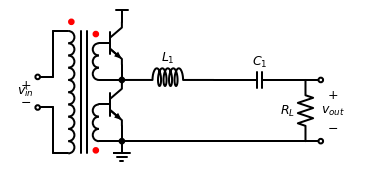

In [18]:
d = schem.Drawing()
xf1 = d.add(e.transformer(t1=5, t2=3, loop=False))
d.move(0,-2.0)
xf2 = d.add(e.transformer(t1=5, t2=3, loop=False))
T1 = d.add(e.BJT_NPN,xy=xf1.s1)
d.add(e.LINE,xy=xf1.s2,tox=T1.emitter)
d.add(e.VDD, xy=T1.collector)
T2 = d.add(e.BJT_NPN,xy=xf2.s1)
d.add(e.LINE,xy=xf2.s2,tox=T2.emitter)
d.add(e.DOT)
d.add(e.LINE, d='down',xy=T1.emitter,  toy=xf1.s2)
d.add(e.DOT)
L1 = d.add(e.INDUCTOR2, d='right', label='$L_1$')
C1 = d.add(e.CAP, d='right',xy=L1.end, label='$C_1$')
R = d.add(e.RES, d='down', label='$R_L$',toy=xf2.s2)
d.add(e.LINE, xy=R.start, d='right', l=0.5)
dot=d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='right',l=0.5)
d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='left', tox=L1.start)
d.add(e.GND)
d.add(e.LINE,d='up',toy=T2.emitter)
d.add(e.LINE,d='up',xy=T2.collector, toy=L1.start)
d.add(e.GAP_LABEL, d='down', xy= dot.start, toy= R.end, label=['+','$v_{out}$','$-$'],lblofst=0.4)

d.add(e.LINE,xy=xf1.p1, d='left',l=0.5)
d.add(e.LINE, d='down',l=1.5)
d.add(e.LINE, d='left',l=0.5)
vin1=d.add(e.DOT_OPEN)
d.add(e.LINE,xy=xf2.p2, d='left',l=0.5)
d.add(e.LINE, d='up',l=1.5)
d.add(e.LINE, d='left',l=0.5)
vin2=d.add(e.DOT_OPEN)
d.add(e.GAP_LABEL, d='down', xy= vin1.start, toy= vin2.start, label=['+','$v_{in}$','$-$'],lblofst=-0.4)

d.move_from(ref=xf1.p1,dx=0.1,dy=0.3)
d.add(e.DOT,color='red')
d.move_from(ref=xf1.s1,dx=-0.1,dy=0.3)
d.add(e.DOT,color='red')
d.move_from(ref=xf2.s2,dx=-0.1,dy=-0.3)
d.add(e.DOT,color='red')
d.draw()

### Aanpassing voor de aansturing off-resonantie

Het schema in {numref}`dfig1NPN` kan ook verder aangepast worden om aansturing toe te laten op frequenties die een klein beetje verschillen van de resonantiefrequentie. Hiervoor is het nodig dat we diodes toevoegen die stroom toelaten die in de omgekeerde richting loopt dan deze van de vermogentransistors.  {numref}`dfig1NPNdiode` toont het aangepaste schema.

###### klasse D versterker met enkel NPN transistors

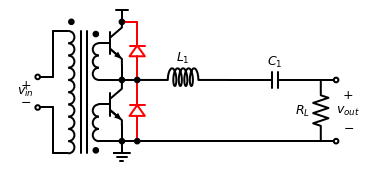

In [24]:
d = schem.Drawing()
xf1 = d.add(e.transformer(t1=5, t2=3, loop=False))
d.move(0,-2.0)
xf2 = d.add(e.transformer(t1=5, t2=3, loop=False))
T1 = d.add(e.BJT_NPN,xy=xf1.s1)
d.add(e.LINE,xy=xf1.s2,tox=T1.emitter)
d.add(e.VDD, xy=T1.collector)
T2 = d.add(e.BJT_NPN,xy=xf2.s1)
d.add(e.LINE,xy=xf2.s2,tox=T2.emitter)
d.add(e.DOT)
d.add(e.LINE, d='down',xy=T1.emitter,  toy=xf1.s2)
d.add(e.DOT)
d.add(e.LINE, d='right',l=0.5)
drive2=d.add(e.DOT)
L1 = d.add(e.INDUCTOR2, d='right', label='$L_1$')
C1 = d.add(e.CAP, d='right',xy=L1.end, label='$C_1$')
R = d.add(e.RES, d='down', label='$R_L$',toy=xf2.s2)
d.add(e.LINE, xy=R.start, d='right', l=0.5)
dot=d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='right',l=0.5)
d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='left', tox=drive2.start)
drive3=d.add(e.Dot)
d.add(e.LINE,xy=R.end, d='left', tox=T2.emitter)
d.add(e.GND)
d.add(e.LINE,d='up',toy=T2.emitter)
d.add(e.LINE,d='up',xy=T2.collector, toy=L1.start)
d.add(e.GAP_LABEL, d='down', xy= dot.start, toy= R.end, label=['+','$v_{out}$','$-$'],lblofst=0.4)

d.add(e.LINE,xy=xf1.p1, d='left',l=0.5)
d.add(e.LINE, d='down',l=1.5)
d.add(e.LINE, d='left',l=0.5)
vin1=d.add(e.DOT_OPEN)
d.add(e.LINE,xy=xf2.p2, d='left',l=0.5)
d.add(e.LINE, d='up',l=1.5)
d.add(e.LINE, d='left',l=0.5)
vin2=d.add(e.DOT_OPEN)
d.add(e.GAP_LABEL, d='down', xy= vin1.start, toy= vin2.start, label=['+','$v_{in}$','$-$'],lblofst=-0.4)

d.move_from(ref=xf1.p1,dx=0.1,dy=0.3)
d.add(e.DOT)
d.move_from(ref=xf1.s1,dx=-0.1,dy=0.3)
d.add(e.DOT)
d.move_from(ref=xf2.s2,dx=-0.1,dy=-0.3)
d.add(e.DOT)


d.add(e.DIODE,d='up',toy=T1.collector,xy=drive2.start,color='red')
d.add(e.LINE, d='left', tox=T1.collector,color='red')
d.add(e.DOT)
d.add(e.DIODE,d='up',xy=drive3.start,toy=drive2.start,color='red')

d.draw()

## Aansturing met transformator aan de kant van de belasting

Het schema in {numref}`dfig1NPN` heeft de transformator aan de kant van de bron. Doordat de NPN transistors moeten aangestuurd worden door een verschil tussen basis en emitter is het hiervoor nodig dat een verschil tussen 2 spanning moet aangelegd worden aan deze transistor,en er dus moet gebruik gemaakt worden van beide klemmen van de secundaire wikkelingen van de transformator.

we kunnen, als alternatief hiervoor, ook de transformator plaatsen aan de kant van de belasting.
{numref}`dfig3spanning` toont hiervan de meest eenvoudige implementatie. De ingangsspanningen ($Vin+$ en $Vin-$) kunnen hiervoor dan rechtstreeks komen van de aanstuurlogica en kunnen eventueel werken op een heel andere (eventueel lagere) spanning.

###### klasse D versterker met spanningssturing

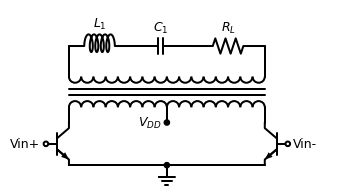

In [19]:
d = schem.Drawing()
xf1 = d.add(e.transformer(t1=16, t2=16, loop=False,d='up').tap(name='VDD', pos=8, side='primary'))
d.add(e.Line(xy=xf1.s1,d='up',l=1))
d.add(e.INDUCTOR2, d='right', label='$L_1$',l=2)
d.add(e.CAP, d='right', label='$C_1$',l=2)
d.add(e.RES, d='right', label='$R_L$',tox=xf1.s2)
d.add(e.Line(toy=xf1.s2,d='down'))
d.add(e.Line(xy=xf1.VDD,d='down',l=0.5))
vdd=d.add(e.Dot(label='$V_{DD}$', lblloc='left'))
d.add(e.Line(xy=xf1.p1,d='down',l=0.5))
T1 = d.add(e.BJT_NPN,anchor='collector',d='right')
d.add(e.Line(xy=xf1.p2,d='down',l=0.5))
T2 = d.add(e.BJT_NPN,anchor='collector',d='left',flip=True)
d.add(e.Line(xy=T2.emitter,d='left',tox=vdd.start))
d.add(e.Dot)
d.add(e.GND)
d.add(e.Line(d='left',tox=T1.emitter))
d.add(e.DOT_OPEN(xy=T1.base,label='Vin+', lblloc='left'))
d.add(e.DOT_OPEN(xy=T2.base,label='Vin-', lblloc='right'))
d.draw()

### Keuze van de wikkelverhouding

Een bijkomend belangrijk voordeel van {numref}`dfig3spanning`is dat de wikkelverhouding van de transformator kan aangepast worden aan het gewenste vermogen ($P_{ac}$) en de beschikbare voedingsspanning.

$$
P_{ac}=\frac{V_{ac}^2}{2 R_L}
$$

En in het schema van {numref}`dfig1` wordt de $V_{dd}$ vastgelegd uit de vergelijking:

$$V_{ac}=\frac{2 V_{dd}}{\pi}$$

Als een gevolg hiervan wordt de voedingsspanning $V_{dd}$ bepaald door het gewenste vermogen in {numref}`dfig1`. Echter in {numref}`dfig3spanning_npns` kunnen we de wikkelverhouding tussen de primaire en de secundaire wikkeling $n_p$:$n_s$ aanpassen om overeen te komen met een vooraf gegeven voedingsspanning. 

###### keuze wikkelverhouding transformator

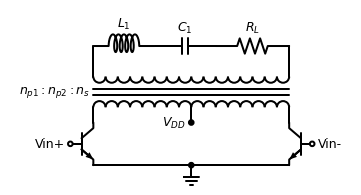

In [20]:
d = schem.Drawing()
xf1 = d.add(e.transformer(t1=16, t2=16, loop=False,d='up').tap(name='VDD', pos=8, side='primary').label('$n_{p1}:n_{p2}:n_{s}$'))
d.add(e.Line(xy=xf1.s1,d='up',l=1))
d.add(e.INDUCTOR2, d='right', label='$L_1$',l=2)
d.add(e.CAP, d='right', label='$C_1$',l=2)
d.add(e.RES, d='right', label='$R_L$',tox=xf1.s2)
d.add(e.Line(toy=xf1.s2,d='down'))
d.add(e.Line(xy=xf1.VDD,d='down',l=0.5))
vdd=d.add(e.Dot(label='$V_{DD}$', lblloc='left'))
d.add(e.Line(xy=xf1.p1,d='down',l=0.5))
T1 = d.add(e.BJT_NPN,anchor='collector',d='right')
d.add(e.Line(xy=xf1.p2,d='down',l=0.5))
T2 = d.add(e.BJT_NPN,anchor='collector',d='left',flip=True)
d.add(e.Line(xy=T2.emitter,d='left',tox=vdd.start))
d.add(e.Dot)
d.add(e.GND)
d.add(e.Line(d='left',tox=T1.emitter))
d.add(e.DOT_OPEN(xy=T1.base,label='Vin+', lblloc='left'))
d.add(e.DOT_OPEN(xy=T2.base,label='Vin-', lblloc='right'))
d.draw()

```{exercise} Keuze van de wikkelverhouding
:class: dropdown

De implementatie van {numref}`listingD1` heeft een voedingsspanning $V_{dd}$ van 20V nodig om een vermogen van 11.3 W te bekomen. We willen hetzelfde vermogen bekomen gebruikmakende van {numref}`dfig3spanning_npns` en een voedingsspanning van $V_{dd}$=6V. De frequentie en alle elementen van de trilkring blijven hetzelfde. Wat moet de wikkelverhouding zijn?
```

### Aanpassing voor de aansturing off-resonantie

Het schema in {numref}`dfig3spanning` kan ook verder aangepast worden om aansturing toe te laten op frequenties die een klein beetje verschillen van de resonantiefrequentie. Hiervoor is het nodig dat we diodes toevoegen die stroom toelaten die in de omgekeerde richting loopt dan deze van de vermogentransistors.  {numref}`dfig3spanningdiode` toont het aangepaste schema.

###### klasse D versterker met spanningssturing en beveiligingsdiodes

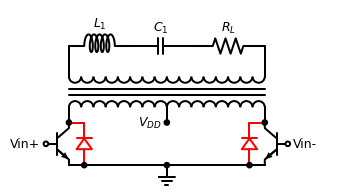

In [21]:
d = schem.Drawing()
xf1 = d.add(e.transformer(t1=16, t2=16, loop=False,d='up').tap(name='VDD', pos=8, side='primary'))
d.add(e.Line(xy=xf1.s1,d='up',l=1))
d.add(e.INDUCTOR2, d='right', label='$L_1$',l=2)
d.add(e.CAP, d='right', label='$C_1$',l=2)
d.add(e.RES, d='right', label='$R_L$',tox=xf1.s2)
d.add(e.Line(toy=xf1.s2,d='down'))
d.add(e.Line(xy=xf1.VDD,d='down',l=0.5))
vdd=d.add(e.Dot(label='$V_{DD}$', lblloc='left'))
d.add(e.Line(xy=xf1.p1,d='down',l=0.5))
T1 = d.add(e.BJT_NPN,anchor='collector',d='right')
d.add(e.Line(xy=xf1.p2,d='down',l=0.5))
T2 = d.add(e.BJT_NPN,anchor='collector',d='left',flip=True)
d1=d.add(e.LINE, d='left', xy=T2.emitter,l=0.5)
d.add(e.DOT)
d.add(e.DIODE,d='up',toy=T2.collector,color='red')
d.add(e.LINE, d='right', tox=T2.collector,color='red')
d.add(e.DOT)
d.add(e.Line(xy=d1.start,d='left',tox=vdd.start))
d.add(e.Dot)
d.add(e.GND)
d.add(e.Line(d='left',tox=T1.emitter))
d.move(0.5,0)
d.add(e.Dot)
d.add(e.DIODE,d='up',toy=T1.collector,color='red')
d.add(e.LINE, d='left', tox=T1.collector,color='red')
d.add(e.DOT)
d.add(e.DOT_OPEN(xy=T1.base,label='Vin+', lblloc='left'))
d.add(e.DOT_OPEN(xy=T2.base,label='Vin-', lblloc='right'))
d.draw()

## Klasse D met stroomsturing

Alle bovenstaande implementaties toonden een klasse D versterker met spanningssturing. Een Klasse D versterker kan echter ook met stroomsturing worden uitgevoerd. {numref}`dfig4stroom` toont hiervan de meest eenvoudige implementatie. Het is hierbij belangrijk dat er pulsen met een constante stroom naar de parallelkring gestuurd worden. Daarom is er in {numref}`dfig4stroom` een grote spoel toegevoegd ($L_{DC}$). De grote waarde van deze spoel zal ervoor zorgen dat de stroom constant is. De richting van deze stroom door de primaire van de transformator (en dus ook richting van de magnetisatie van de transformator) wordt aangepast door afwisselend $Vin+$ en $Vin-$ aan te sturen.


###### met stroomsturing

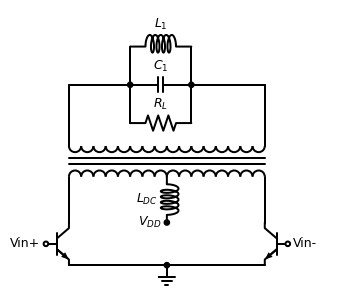

In [22]:
d = schem.Drawing()
xf1 = d.add(e.transformer(t1=16, t2=16, loop=False,d='up').tap(name='VDD', pos=8, side='primary'))
d.add(e.Line(xy=xf1.s1,d='up',l=2))
d.add(e.Line, d='right',l=2)
d.add(e.Dot)
c1=d.add(e.CAP,d='right', label='$C_1$',l=2)
d.add(e.Dot)
d.add(e.Line(xy=c1.start,d='up',l=1.25))
d.add(e.INDUCTOR2,  d='right', label='$L_1$',l=2)
d.add(e.Line(toy=c1.end,d='down'))
d.add(e.Line(xy=c1.start,d='down',l=1.25))
d.add(e.RES, d='right', label='$R_L$',l=2)
d.add(e.Line(toy=c1.end,d='up'))
d.add(e.Line, d='right',tox=xf1.s2)
d.add(e.Line(toy=xf1.s2,d='down'))
d.add(e.INDUCTOR2(xy=xf1.VDD,d='down',l=1.5, label='$L_{DC}$'))
vdd=d.add(e.Dot(label='$V_{DD}$', lblloc='left'))
d.add(e.Line(xy=xf1.p1,d='down',l=1.5))
T1 = d.add(e.BJT_NPN,anchor='collector',d='right')
d.add(e.Line(xy=xf1.p2,d='down',l=1.5))
T2 = d.add(e.BJT_NPN,anchor='collector',d='left',flip=True)
d.add(e.Line(xy=T2.emitter,d='left',tox=vdd.start))
d.add(e.Dot)
d.add(e.GND)
d.add(e.Line(d='left',tox=T1.emitter))
d.add(e.DOT_OPEN(xy=T1.base,label='Vin+', lblloc='left'))
d.add(e.DOT_OPEN(xy=T2.base,label='Vin-', lblloc='right'))
d.draw()

### Aanpassing voor de aansturing off-resonantie

Het schema in {numref}`dfig4stroom` kan ook verder aangepast worden om aansturing toe te laten op frequenties die een klein beetje verschillen van de resonantiefrequentie. Hiervoor is het nodig dat we diodes toevoegen die stroom toelaten die in de omgekeerde richting loopt dan deze van de vermogentransistors.  {numref}`dfig4stroomdiode` toont het aangepaste schema.

###### met stroomsturing en beveiligingsdiodes

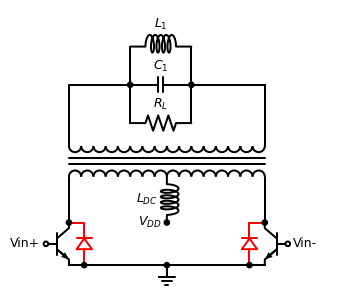

In [23]:
d = schem.Drawing()
xf1 = d.add(e.transformer(t1=16, t2=16, loop=False,d='up').tap(name='VDD', pos=8, side='primary'))
d.add(e.Line(xy=xf1.s1,d='up',l=2))
d.add(e.Line, d='right',l=2)
d.add(e.Dot)
c1=d.add(e.CAP,d='right', label='$C_1$',l=2)
d.add(e.Dot)
d.add(e.Line(xy=c1.start,d='up',l=1.25))
d.add(e.INDUCTOR2,  d='right', label='$L_1$',l=2)
d.add(e.Line(toy=c1.end,d='down'))
d.add(e.Line(xy=c1.start,d='down',l=1.25))
d.add(e.RES, d='right', label='$R_L$',l=2)
d.add(e.Line(toy=c1.end,d='up'))
d.add(e.Line, d='right',tox=xf1.s2)
d.add(e.Line(toy=xf1.s2,d='down'))
d.add(e.INDUCTOR2(xy=xf1.VDD,d='down',l=1.5, label='$L_{DC}$'))
vdd=d.add(e.Dot(label='$V_{DD}$', lblloc='left'))
d.add(e.Line(xy=xf1.p1,d='down',l=1.5))
T1 = d.add(e.BJT_NPN,anchor='collector',d='right')
d.add(e.Line(xy=xf1.p2,d='down',l=1.5))
T2 = d.add(e.BJT_NPN,anchor='collector',d='left',flip=True)
d1=d.add(e.LINE, d='left', xy=T2.emitter,l=0.5)
d.add(e.DOT)
d.add(e.DIODE,d='up',toy=T2.collector,color='red')
d.add(e.LINE, d='right', tox=T2.collector,color='red')
d.add(e.DOT)
d.add(e.Line(xy=d1.start,d='left',tox=vdd.start))
d.add(e.Dot)
d.add(e.GND)
d.add(e.Line(d='left',tox=T1.emitter))
d.move(0.5,0)
d.add(e.Dot)
d.add(e.DIODE,d='up',toy=T1.collector,color='red')
d.add(e.LINE, d='left', tox=T1.collector,color='red')
d.add(e.DOT)
d.add(e.DOT_OPEN(xy=T1.base,label='Vin+', lblloc='left'))
d.add(e.DOT_OPEN(xy=T2.base,label='Vin-', lblloc='right'))
d.draw()